In [1]:
!pip install hiddenlayer

In [2]:
import torch
import torch.nn as nn
import hiddenlayer as hl

In [3]:
class WAZIR(nn.Module): 
#INITIALIZE ALL HYPER-PARAMETERS
    def __init__(self, kernel_size = 3, n_channels = 64):
        super(WAZIR, self).__init__()
        self.prelu = nn.PReLU()
        self.conv1 = nn.Conv2d(1, 196, kernel_size)
        self.conv2 = nn.Conv2d(196, 166, kernel_size)
        self.conv3 = nn.Conv2d(166, 196, kernel_size)
        self.conv4 = nn.Conv2d(196, 166, kernel_size)
        
#DRAW THE CONNECTION CONFIGURATION
    def forward(self, x):
        C1 = self.conv1(x)
        A1 = self.prelu(C1)
        C2 = self.conv2(A1)
        A2 = self.prelu(C2)
        C3 = self.conv3(A2)
        A3 = self.prelu(C3)
        return A3

model = WAZIR()
print(model)

WAZIR(
  (prelu): PReLU(num_parameters=1)
  (conv1): Conv2d(1, 196, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(196, 166, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(166, 196, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(196, 166, kernel_size=(3, 3), stride=(1, 1))
)


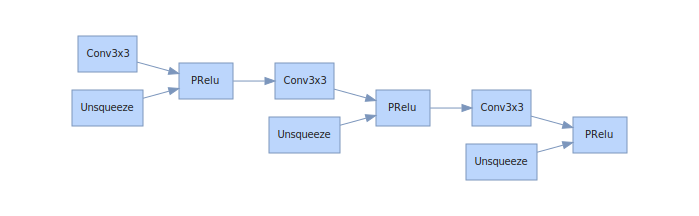

In [4]:
hl_graph = hl.build_graph(model, torch.zeros([1, 1, 26,26]))
hl_graph.theme = hl.graph.THEMES["blue"].copy()  
hl_graph

In [5]:
import torch
import torchvision.models
import hiddenlayer as hl

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:1630: UserWarning: Dropout is a training op and should not be exported in inference mode. For inference, make sure to call eval() on the model and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


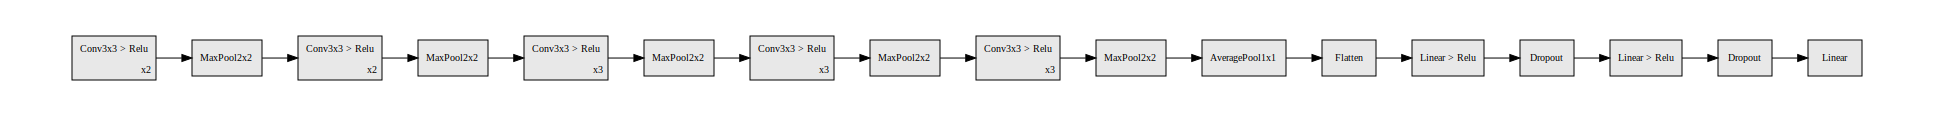

In [6]:
# VGG16 with BatchNorm
model = torchvision.models.vgg16()
hl.build_graph(model, torch.zeros([1, 3, 224, 224]))

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:1630: UserWarning: Dropout is a training op and should not be exported in inference mode. For inference, make sure to call eval() on the model and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


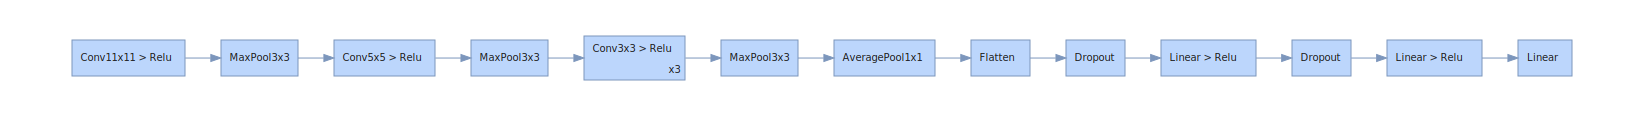

In [7]:
# AlexNet
model = torchvision.models.alexnet()
hl_graph = hl.build_graph(model, torch.zeros([1, 3, 224, 224]))
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph